# Labb 2 - Machine Learning

In this labb a simple machinelearning algorythm will be made in order to differeantiate between Pikachu and Pichu, depending on their heights and widhts. The algorythm needs to be able to classify new data points as either Pikachu or Pinchu.

---

## 2.0 Python Modules

Imports nessearycy python modules for this labb.

In [2]:
import re                   # Imports regular expression 
import math                 # Imports math expressions
import matplotlib as plt    # Imports matplot to allow functions etc to be drawn
import matplotlib.pyplot as plt
import numpy as np

---

## 2.1 Data

### 2.1.1 Read the Data

In [3]:
data_path = "Data/datapoints.txt"               # Assigns the data path to a variable

try:                                            # Attempts to open the data at the given path
    with open(data_path, "r") as f:
        data = f.readlines()                    # Assigns the datapoints to the variable "data", and opens it below.
except FileNotFoundError:                       # Error handling, incase there is no datapoints.txt or the path has changed, generats an error
        data = None # WIP: Raise custom error?

print(data[:5])

['(width (cm), height (cm), label (0-pichu, 1-pikachu))\n', '21.959384499160468, 31.23956701424158, 0\n', '23.63591632187622, 36.46821490673444, 1\n', '17.714056417303343, 31.44170391314962, 0\n', '21.78020031891186, 33.213397759738264, 1\n']


### 2.1.2 Store the Data

After succesfully reading the data, it needs to be stored in an easier manner.

In [4]:
structured_data = list()

for line in data[1:]:                                   # Skip the first line
    data_list = line.strip("\n").split(", ")            # Remove all the \n from line and split to three fields
    if len(data_list) != 3:                             # print(len(data_list))
        raise ValueError("Datapoints contains invaild line format")
    try:
        width = float(data_list[0])
        height = float(data_list[1])
        is_pikachu = int(data_list[2])
    except:
        raise ValueError("Datapoints line expected numerical input") from None # Disrgard associantion/"chain" with original error
    structured_data.append((width, height, is_pikachu)) # Note the double brackets, appending a tuple

print(structured_data[:5])

[(21.959384499160468, 31.23956701424158, 0), (23.63591632187622, 36.46821490673444, 1), (17.714056417303343, 31.44170391314962, 0), (21.78020031891186, 33.213397759738264, 1), (25.20630552859312, 36.558816149350534, 1)]


### 2.1.3 Plot the Data Points

Each class recives its own color

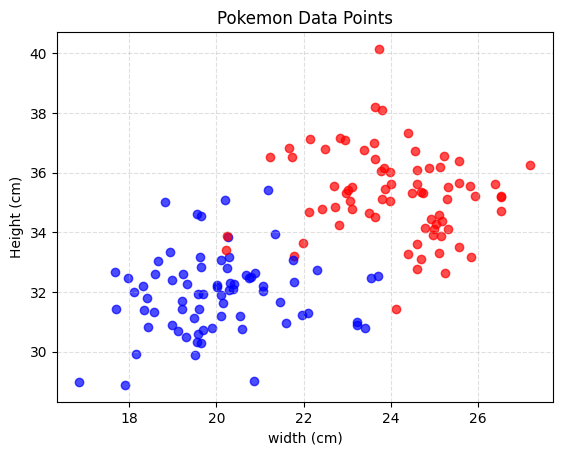

In [5]:
plt.title("Pokemon Data Points")        # sets title
plt.subplot(1,1,1)                      # sets size
plt.grid(linestyle = '--', alpha=0.4)   # adds gridlines with alpha
plt.xlabel("width (cm)")                # x-label
plt.ylabel("Height (cm)")               # y-label

# unpacking the tuple
for (width, height, is_pikachu) in structured_data:
    color = "blue"              # orginally made if & else statement with an empty variable, 
    if is_pikachu == 1:         # but since the default value is blue we only need to change the color when its Pikachu
        color = "red"
    plt.scatter(width, height, color=color, alpha=0.7)          # Scatters the width, height and color, and an alpha for better readability

plt.show()     

In [6]:
plt.savefig("../assets/Pokemon.png", dpi=200)

<Figure size 640x480 with 0 Axes>

---

## 2.2 Testpoints

In [7]:
testpoints_path = "Data/testpoints.txt"               # Assigns the data path to a variable

try:                                            # Attempts to open the data at the given path
    with open(testpoints_path, "r") as f:
        testpoint_data = f.readlines()                    # Assigns the datapoints to the variable "data", and opens it below.
except FileNotFoundError:                       # Error handling, incase there is no datapoints.txt or the path has changed, generats an error
        testpoint_data = None # WIP: Raise custom error?

print(testpoint_data)
print(type(testpoint_data))

['Test points:\n', '1. (25, 32)\n', '2. (24.2, 31.5)\n', '3. (22, 34)\n', '4. (20.5, 34)\n']
<class 'list'>


In [8]:
distance = math.dist(structured_data[0], structured_data[1] )
print(distance)

5.581175300619809


In [9]:
testpoint = list()
for line in testpoint_data[1:]:
    testpoint_list = line[3:-1].strip("() ").split(", ")
    if len(testpoint_list) != 2:
        raise ValueError("Datapoints contains invaild line format")
    try:
        width = float(testpoint_list[0])
        height = float(testpoint_list[1]) 
    except:
        raise ValueError("Datapoints line expected numerical input") from None
    testpoint.append((width, height))

print(testpoint)

[(25.0, 32.0), (24.2, 31.5), (22.0, 34.0), (20.5, 34.0)]


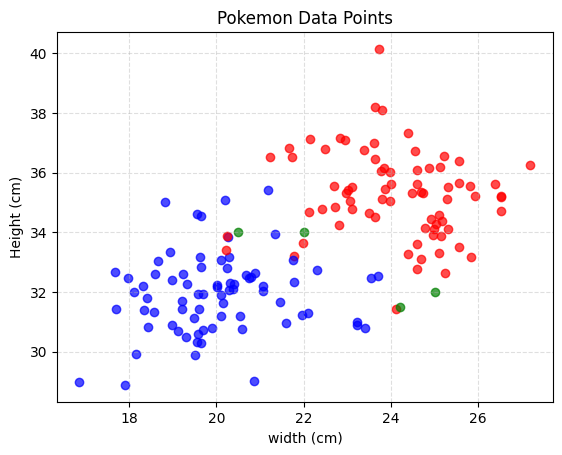

In [10]:
plt.title("Pokemon Data Points")        # sets title
plt.subplot(1,1,1)                      # sets size
plt.grid(linestyle = '--', alpha=0.4)   # adds gridlines with alpha
plt.xlabel("width (cm)")                # x-label
plt.ylabel("Height (cm)")               # y-label

# unpacking the tuple
for (width, height, is_pikachu) in structured_data:
    color = "blue"              # orginally made if & else statement with an empty variable, 
    if is_pikachu == 1:         # but since the default value is blue we only need to change the color when its Pikachu
        color = "red"
    plt.scatter(width, height, color=color, alpha=0.7)          # Scatters the width, height and color, and an alpha for better readability


for (width, height) in testpoint:
    color = "green"              # orginally made if & else statement with an empty variable, 
    plt.scatter(width, height, color=color, alpha=0.7)  

plt.show()  

---

## 3. Calculate distance [Testing Zone]

Determine the distance between Datapoints & Testpoints.

In [11]:
print(structured_data[:5])
print(testpoint)
print(type(structured_data))
print(type(testpoint))

[(21.959384499160468, 31.23956701424158, 0), (23.63591632187622, 36.46821490673444, 1), (17.714056417303343, 31.44170391314962, 0), (21.78020031891186, 33.213397759738264, 1), (25.20630552859312, 36.558816149350534, 1)]
[(25.0, 32.0), (24.2, 31.5), (22.0, 34.0), (20.5, 34.0)]
<class 'list'>
<class 'list'>


### 3.1 Structured Data 

In [12]:
structured_data

[(21.959384499160468, 31.23956701424158, 0),
 (23.63591632187622, 36.46821490673444, 1),
 (17.714056417303343, 31.44170391314962, 0),
 (21.78020031891186, 33.213397759738264, 1),
 (25.20630552859312, 36.558816149350534, 1),
 (19.332572350434354, 32.25325633655492, 0),
 (24.73645685241186, 35.33291181124776, 1),
 (23.79257560586339, 38.10372825362463, 1),
 (24.557612968127465, 36.73144402805611, 1),
 (20.191281253428173, 35.06966921830237, 0),
 (25.813562951888365, 35.561029988644336, 1),
 (24.923378667802954, 34.463907946680294, 1),
 (25.311244044578427, 34.117212558131975, 1),
 (22.819091361866796, 34.25516433025548, 1),
 (19.639358214988224, 34.56117030001663, 0),
 (18.341233265627693, 31.399261188293124, 0),
 (22.723629043769336, 34.83845262048311, 1),
 (25.82936770950206, 33.16210202637511, 1),
 (20.23890182459327, 32.78945132868386, 0),
 (17.905128921789093, 28.88813385482529, 0),
 (24.385289647525166, 37.335669057387726, 1),
 (26.525412887538252, 35.2192205449002, 1),
 (19.299333

In [13]:
unpacking_structured_data = structured_data[0]
unpacking_structured_data

(21.959384499160468, 31.23956701424158, 0)

In [14]:
structured_data_unpack_width = unpacking_structured_data[0]
structured_data_unpack_height = unpacking_structured_data[1]
print(structured_data_unpack_width, structured_data_unpack_height)

21.959384499160468 31.23956701424158


### 3.2 Testpoint Data

In [15]:
testdata_unpack = testpoint[0]
testdata_unpack

(25.0, 32.0)

In [16]:
for i in range(0, len(testpoint)):
     print(testpoint[i])

(25.0, 32.0)
(24.2, 31.5)
(22.0, 34.0)
(20.5, 34.0)


In [17]:
testdata_unpack_width = testdata_unpack[0]
testdata_unpack_height = testdata_unpack[1]
print(testdata_unpack_width, testdata_unpack_height)

25.0 32.0


In [18]:
for item in testpoint:
     print(item)

(25.0, 32.0)
(24.2, 31.5)
(22.0, 34.0)
(20.5, 34.0)


In [19]:
for x in testpoint:
    print(x)

(25.0, 32.0)
(24.2, 31.5)
(22.0, 34.0)
(20.5, 34.0)


In [20]:
for i in range(len(testpoint)):
    print(i, testpoint[i])

0 (25.0, 32.0)
1 (24.2, 31.5)
2 (22.0, 34.0)
3 (20.5, 34.0)


### 3.3 Calculation Test

- alla tränings data ska jämföras mot en testpunkt i taget
- jämför mot träningsdata
- kortaste avståndet ger klassen


#### Width

In [21]:
width_structured_data = []
for point in structured_data:
    width_structured_data.append(point[0])

width_structured_data[:5]

[21.959384499160468,
 23.63591632187622,
 17.714056417303343,
 21.78020031891186,
 25.20630552859312]

#### Height

In [22]:
height_structured_data =[]
for point in structured_data:
    height_structured_data.append(point[1])

height_structured_data[:5]

[31.23956701424158,
 36.46821490673444,
 31.44170391314962,
 33.213397759738264,
 36.558816149350534]

#### Labels

In [23]:
label_structured_data =[]
for point in structured_data:
    label_structured_data.append(point[2])

label_structured_data[:5]

[0, 1, 0, 1, 1]

#### List within a List, containing Width, Height & Index

In [24]:
structured_data_cleaned_final =[]
for i in range(len(width_structured_data)):
    structured_data_cleaned_final.append([width_structured_data[i], height_structured_data[i], label_structured_data[i]])

structured_data_cleaned_final[:5]

[[21.959384499160468, 31.23956701424158, 0],
 [23.63591632187622, 36.46821490673444, 1],
 [17.714056417303343, 31.44170391314962, 0],
 [21.78020031891186, 33.213397759738264, 1],
 [25.20630552859312, 36.558816149350534, 1]]

In [25]:
testpoint[0][0]

25.0

In [26]:
import numpy as np

training_data_matrix = np.array(structured_data_cleaned_final)
distances_to_test = np.sqrt((training_data_matrix[:,0]-testpoint[0][0])**2+ (training_data_matrix[:,1]-testpoint[0][1])**2)
index_min = np.argmin(distances_to_test)
index_min

111

In [27]:
distances_to_test[:4]

array([3.13426243, 4.67179502, 7.3073024 , 3.44084933])

In [28]:
training_data_matrix[:,2][index_min]

1.0

In [29]:
"""
classification_list = []

for point in testpoint:
    np.append([distances_to_test],[index_min])
    
classification_list
"""

'\nclassification_list = []\n\nfor point in testpoint:\n    np.append([distances_to_test],[index_min])\n    \nclassification_list\n'

In [30]:
classification_list = []
for point in testpoint:
    classification_list.append(point[i])

classification_list[:5]

IndexError: tuple index out of range

In [ ]:
height_structured_data =[]
for point in structured_data:
    height_structured_data.append(point[1])

height_structured_data[:5]

In [ ]:
([width_structured_data[i], height_structured_data[i]])

[22.30210323807139, 32.73237945145149]

In [ ]:
calc_euclidean_distance = math.dist((structured_data_cleaned_final[0][0],structured_data_cleaned_final[0][1]),testpoint[0])
calc_euclidean_distance

3.134262425160839

# dont scroll past this

--------

In [ ]:
structured_data_cleaned =[]
for i in range(len(width_structured_data)):
    structured_data_cleaned.append([width_structured_data[i], height_structured_data[i]])

structured_data_cleaned[:5]

[[21.959384499160468, 31.23956701424158],
 [23.63591632187622, 36.46821490673444],
 [17.714056417303343, 31.44170391314962],
 [21.78020031891186, 33.213397759738264],
 [25.20630552859312, 36.558816149350534]]

In [ ]:
type(testpoint[0])

tuple

In [ ]:
calc_euclidean_distance = math.dist((structured_data_cleaned[0][0],structured_data_cleaned[0][1]),testpoint[0])
calc_euclidean_distance

3.134262425160839

In [ ]:
structured_data_cleaned =[]
for i in range(len(width_structured_data)):
    structured_data_cleaned.append([width_structured_data[i], height_structured_data[i]])

structured_data_cleaned[:5]

[[21.959384499160468, 31.23956701424158],
 [23.63591632187622, 36.46821490673444],
 [17.714056417303343, 31.44170391314962],
 [21.78020031891186, 33.213397759738264],
 [25.20630552859312, 36.558816149350534]]

In [ ]:
Euclidean_distance_test = math.dist([structured_data_unpack_width, structured_data_unpack_height], [testdata_unpack_width, testdata_unpack_height])
Euclidean_distance_test

3.134262425160839

- for loop i en for loop
- första går igenom test punkter, loop
- for loop, jämför med math.dist. 

In [ ]:
structured_data_cleaned_final[:5]

[[21.959384499160468, 31.23956701424158, 0],
 [23.63591632187622, 36.46821490673444, 1],
 [17.714056417303343, 31.44170391314962, 0],
 [21.78020031891186, 33.213397759738264, 1],
 [25.20630552859312, 36.558816149350534, 1]]

In [ ]:
point[0]

20.5

In [ ]:
shortest_distance = min(point)
shortest_distance

20.5

### 4. tests

----------

In [ ]:
point_1 = (1,2)
point_2 = (4,7)

from math import dist 
dist_math = dist(point_1, point_2)

print(dist_math)

5.8309518948453


In [ ]:
x_distance = data_matrix[:,0] - testpunkt[0]
y_distance = data_matrix[:,1] - testpunkt[1]

print(x_distance[:5])
print(y_distance[:5])

[-3.0406155  -1.36408368 -7.28594358 -3.21979968  0.20630553]
[-0.76043299  4.46821491 -0.55829609  1.21339776  4.55881615]


In [ ]:
distance_squared = x_distance**2 + y_distance**2
print(distance_squared)
distance = np.sqrt(distance_squared)

print(distance)

[ 9.82360095 21.82566873 53.39666841 11.83944411 20.82536665 32.18387494
 11.17775613 38.71337226 22.58226888 32.54664509 13.34281926  6.0767132
  4.57946187  9.84212864 35.29607365 44.70006154 13.23867801  2.03833192
 23.29128924 60.02090652 28.84723311 12.69026539 34.78877126 23.83911153
 15.09347955 49.66560177 12.70365637 41.29208173 33.86107861 51.01255069
 36.25830499  5.76057163 41.63773152 11.40993359 15.50259944 23.66974668
 54.13896269 17.92410213 24.64410031 21.24095643 13.18144645 15.03853695
 13.764274   10.40745662 11.11640167  1.12862061 25.15973139 17.32246036
 13.23123538 34.38196688 41.35148164 15.496376   17.23485341 25.71755621
 31.21760223 21.95927132 17.1122885  23.58565038 38.62328091 15.52578481
 31.00063974  9.5979796  25.35040206 21.05473214 26.17500477  2.7871612
 17.66383141 19.60456824  2.02043468 29.74762749 31.3982392  17.00242872
 27.53857835 20.41824907 36.47026489 26.76178567  3.61032077 11.3046628
 14.08757785 18.19737728 29.18095992 24.93565082 14.40

In [ ]:
x_distance = data_matrix[:,0] - testpunkt[0]
y_distance = data_matrix[:,1] - testpunkt[1]

print(x_distance[:5])
print(y_distance[:5])

[-3.0406155  -1.36408368 -7.28594358 -3.21979968  0.20630553]
[-0.76043299  4.46821491 -0.55829609  1.21339776  4.55881615]


In [ ]:
testpunkt[1]

32.0

1 åt gången
räkna var för sig
